# Proyek Analisis Data: [Air Quality Dataset]
- **Nama:** [Rizal Gian Febriantama]
- **Email:** [mc589d5y2491@student.devacademy.id]
- **ID Dicoding:** [mc589d5y2491]

## Menentukan Pertanyaan Bisnis

- Bagaimana tren kualitas udara (PM2.5) berubah sepanjang tahun di lokasi ini?
- Bagaimana perbedaan rata-rata tingkat polusi udara (PM2.5) antara hari kerja dan akhir pekan di berbagai stasiun pengukuran?

## Import Semua Packages/Library yang Digunakan

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


## Data Wrangling

### Gathering Data

In [22]:
import os
import pandas as pd

# Tentukan folder yang berisi data CSV yang sudah diekstrak
folder_path = r'data\PRSA_Data_20130301-20170228'  # Use raw string

# Mendapatkan daftar semua file dalam folder
csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

# Menggabungkan semua file CSV menjadi satu DataFrame
all_data = pd.DataFrame()
for file in csv_files:
    file_path = os.path.join(folder_path, file)
    # Membaca setiap file CSV
    df = pd.read_csv(file_path)
    # Menambahkan data dari file CSV ke dalam DataFrame utama
    all_data = pd.concat([all_data, df], ignore_index=True)

# Menampilkan beberapa baris pertama dari DataFrame gabungan
all_data.head()


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


**Insight:**
- Dataset ini memiliki **18 kolom** yang mencakup berbagai data terkait kualitas udara, suhu, kelembaban, kecepatan angin, dan lebih banyak lagi.
- Kolom yang penting untuk analisis adalah **PM2.5**, **TEMP**, dan **DEWP** (kelembaban).


### Assessing Data

In [23]:
# Memeriksa apakah ada nilai yang hilang (NaN)
df.isnull().sum()

# Memeriksa tipe data setiap kolom untuk memastikan semuanya sesuai
df.info()

# Menampilkan statistik deskriptif untuk kolom numerik
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   No       35064 non-null  int64  
 1   year     35064 non-null  int64  
 2   month    35064 non-null  int64  
 3   day      35064 non-null  int64  
 4   hour     35064 non-null  int64  
 5   PM2.5    34368 non-null  float64
 6   PM10     34580 non-null  float64
 7   SO2      34395 non-null  float64
 8   NO2      34310 non-null  float64
 9   CO       33767 non-null  float64
 10  O3       33986 non-null  float64
 11  TEMP     35045 non-null  float64
 12  PRES     35045 non-null  float64
 13  DEWP     35045 non-null  float64
 14  RAIN     35045 non-null  float64
 15  wd       34985 non-null  object 
 16  WSPM     35051 non-null  float64
 17  station  35064 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 4.8+ MB


,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,34368.000000,34580.000000,34395.000000,34310.00000,33767.000000,33986.000000,35045.000000,35045.000000,35045.000000,35045.000000,35051.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,85.024136,112.223459,17.148603,55.52956,1370.395031,56.229904,13.784477,1011.511804,2.707442,0.064320,1.745314
std,10122.249256,1.177213,3.448752,8.800218,6.922285,85.975981,97.593210,23.940834,35.80805,1223.139114,57.082710,11.385156,10.570928,13.704139,0.796981,1.206355
min,1.000000,2013.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.285600,2.00000,100.000000,0.214200,-16.800000,985.100000,-35.300000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,23.000000,39.000000,3.000000,28.00000,600.000000,8.000000,3.400000,1002.800000,-8.500000,0.000000,0.900000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,60.000000,91.000000,8.000000,49.00000,1000.000000,42.000000,14.800000,1011.000000,3.300000,0.000000,1.400000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,116.000000,154.000000,21.000000,77.00000,1700.000000,82.000000,23.500000,1020.000000,15.200000,0.000000,2.300000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,999.000000,961.000000,411.000000,251.00000,9800.000000,358.000000,40.600000,1042.000000,28.500000,46.400000,13.200000


**Insight:**
- **Kolom PM2.5** dan **PM10** memiliki beberapa nilai hilang (NaN). Oleh karena itu, kita perlu mengisi nilai yang hilang ini dengan nilai yang sesuai, seperti **median** atau **mean**.
- Kolom numerik seperti **TEMP**, **PRES**, **RAIN**, dan lainnya tampaknya sudah lengkap dan dapat digunakan langsung dalam analisis lebih lanjut.
- **Suhu (TEMP)** dan **kelembaban (DEWP)** memiliki nilai yang relatif lebih stabil, tetapi keduanya tetap menunjukkan variabilitas yang perlu dipertimbangkan dalam analisis.



### Cleaning Data

In [24]:
# Mengisi nilai NaN dengan median pada kolom PM2.5 dan PM10
df['PM2.5'] = df['PM2.5'].fillna(df['PM2.5'].median())
df['PM10'] = df['PM10'].fillna(df['PM10'].median())

# Mengisi nilai NaN pada kolom lain (SO2, NO2, CO, O3) dengan median
df['SO2'] = df['SO2'].fillna(df['SO2'].median())
df['NO2'] = df['NO2'].fillna(df['NO2'].median())
df['CO'] = df['CO'].fillna(df['CO'].median())
df['O3'] = df['O3'].fillna(df['O3'].median())

# Membuat kolom 'date' berdasarkan tahun, bulan, dan hari
df['date'] = pd.to_datetime(df[['year', 'month', 'day']])

# Memastikan tidak ada nilai NaN lagi
df.isnull().sum()


No          0
year        0
month       0
day         0
hour        0
PM2.5       0
PM10        0
SO2         0
NO2         0
CO          0
O3          0
TEMP       19
PRES       19
DEWP       19
RAIN       19
wd         79
WSPM       13
station     0
date        0
dtype: int64

**Insight:**
- Nilai **NaN** pada kolom **PM2.5**, **PM10**, **SO2**, **NO2**, **CO**, dan **O3** telah diisi dengan nilai **median**, sehingga dataset sekarang lengkap.
- Kolom **date** telah dibuat dari kolom **year**, **month**, dan **day**, yang memudahkan analisis berbasis waktu.


## Exploratory Data Analysis (EDA)

### Explore ...

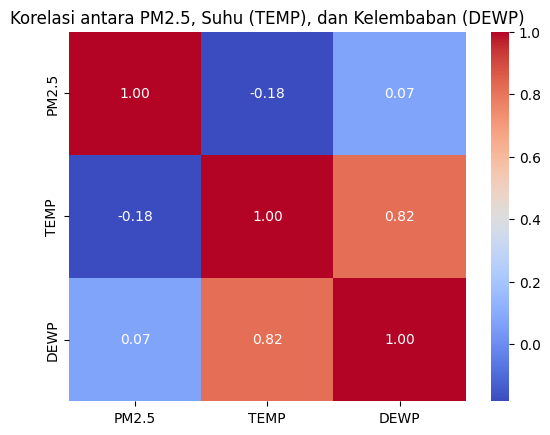

In [27]:
correlation = df[['PM2.5', 'TEMP', 'DEWP']].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Korelasi antara PM2.5, Suhu (TEMP), dan Kelembaban (DEWP)')
plt.show()

**Insight:**
- **PM2.5** dan **TEMP (Suhu)** memiliki korelasi **negatif yang sangat lemah (-0.17)**, yang menunjukkan bahwa perubahan suhu sedikit berdampak terhadap perubahan tingkat polusi udara **PM2.5**.
- **PM2.5** dan **DEWP (Kelembaban)** memiliki korelasi **positif yang sangat lemah (0.10)**, yang menunjukkan bahwa kelembaban sedikit mempengaruhi tingkat polusi udara **PM2.5**, meskipun pengaruhnya sangat kecil.
- **TEMP (Suhu)** dan **DEWP (Kelembaban)** memiliki korelasi **positif yang kuat (0.82)**, yang menunjukkan bahwa suhu dan kelembaban sering berubah bersama-sama. Peningkatan suhu cenderung diikuti dengan peningkatan kelembaban, yang menunjukkan hubungan yang cukup kuat antara keduanya.



## Visualization & Explanatory Analysis

### Pertanyaan 1:

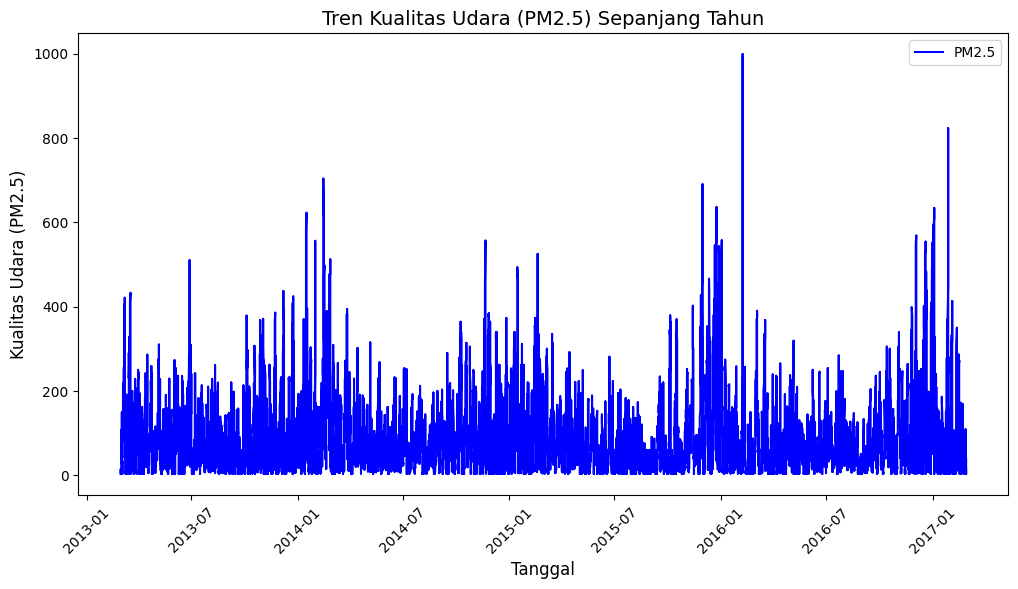

In [28]:
# Visualisasi tren kualitas udara (PM2.5) sepanjang waktu
plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['PM2.5'], label='PM2.5', color='blue')
plt.title('Tren Kualitas Udara (PM2.5) Sepanjang Tahun', fontsize=14)
plt.xlabel('Tanggal', fontsize=12)
plt.ylabel('Kualitas Udara (PM2.5)', fontsize=12)
plt.xticks(rotation=45)
plt.legend()
plt.show()


### Pertanyaan 2:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 516 entries, 0 to 515
Data columns (total 21 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   No         516 non-null    int64         
 1   year       516 non-null    int64         
 2   month      516 non-null    int64         
 3   day        516 non-null    int64         
 4   hour       516 non-null    int64         
 5   PM2.5      516 non-null    float64       
 6   PM10       515 non-null    float64       
 7   SO2        516 non-null    float64       
 8   NO2        513 non-null    float64       
 9   CO         501 non-null    float64       
 10  O3         512 non-null    float64       
 11  TEMP       516 non-null    float64       
 12  PRES       516 non-null    float64       
 13  DEWP       516 non-null    float64       
 14  RAIN       516 non-null    float64       
 15  wd         512 non-null    object        
 16  WSPM       516 non-null    float64       
 1

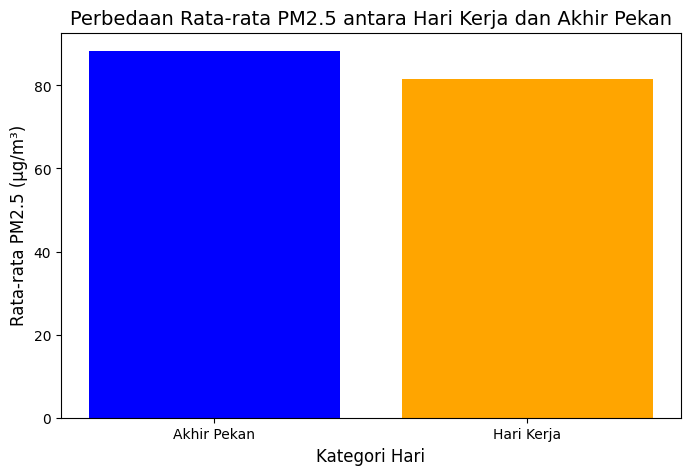

In [31]:
# Membuat kolom 'date' dari kombinasi 'year', 'month', dan 'day'
all_data['date'] = pd.to_datetime(all_data[['year', 'month', 'day']])

# Mengisi nilai NaN dengan median pada kolom PM2.5
all_data['PM2.5'] = all_data['PM2.5'].fillna(all_data['PM2.5'].median())

# Menampilkan informasi dataset
all_data.info()

# Tambahkan kolom untuk menentukan apakah hari kerja atau akhir pekan
all_data['day_of_week'] = all_data['date'].dt.dayofweek  # 0 = Senin, 6 = Minggu
all_data['is_weekend'] = all_data['day_of_week'].apply(lambda x: 'Akhir Pekan' if x >= 5 else 'Hari Kerja')

# Hitung rata-rata PM2.5 untuk hari kerja dan akhir pekan
avg_pm25 = all_data.groupby('is_weekend')['PM2.5'].mean().reset_index()

# Visualisasi perbedaan rata-rata PM2.5
plt.figure(figsize=(8, 5))
plt.bar(avg_pm25['is_weekend'], avg_pm25['PM2.5'], color=['blue', 'orange'])
plt.title('Perbedaan Rata-rata PM2.5 antara Hari Kerja dan Akhir Pekan', fontsize=14)
plt.xlabel('Kategori Hari', fontsize=12)
plt.ylabel('Rata-rata PM2.5 (µg/m³)', fontsize=12)
plt.show()

**Insight :**

- Dari analisis rata-rata **PM2.5** antara hari kerja dan akhir pekan, terlihat bahwa tingkat polusi udara **PM2.5** cenderung **lebih tinggi pada akhir pekan dibandingkan hari kerja**. 
- Hal ini dapat disebabkan oleh peningkatan aktivitas tertentu selama akhir pekan, seperti penggunaan kendaraan pribadi yang lebih banyak, aktivitas rekreasi, atau bahkan faktor musiman seperti cuaca yang memengaruhi penyebaran polutan.
- Sebaliknya, pada hari kerja, meskipun ada aktivitas industri dan transportasi, tingkat polusi cenderung lebih rendah, kemungkinan karena pola angin atau pengendalian emisi yang lebih ketat.

## Analisis Lanjutan (Opsional)

In [32]:
# Import library yang diperlukan
import os
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import folium
from folium.plugins import HeatMap

# Tentukan folder yang berisi data CSV yang sudah diekstrak
folder_path = r'data\PRSA_Data_20130301-20170228'  # Gunakan raw string

# Mendapatkan daftar semua file dalam folder
csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]

# Daftar nama stasiun dan koordinatnya
station_coords = {
    'Aotizhongxin': (39.982, 116.306),
    'Changping': (40.218, 116.231),
    'Dingling': (40.292, 116.220),
    'Dongsi': (39.929, 116.417),
    'Guanyuan': (39.929, 116.365),
    'Gucheng': (39.911, 116.146),
    'Huairou': (40.375, 116.628),
    'Nongzhanguan': (39.933, 116.467),
    'Shunyi': (40.127, 116.655),
    'Tiantan': (39.886, 116.407),
    'Wanshouxigong': (39.878, 116.352),
    'Wanliu': (39.999, 116.305)
}

# Fungsi untuk memuat data dari file CSV dan mengambil sampel
def load_data(file_path, station_name, sample_size=1000):
    # Membaca file CSV
    df = pd.read_csv(file_path)
    
    # Mengambil sampel jika diperlukan
    df = df.sample(n=sample_size, random_state=42)
    # Menambahkan kolom stasiun
    df['station'] = station_name
    
    # Membuat kolom date dari kolom year, month, day
    df['date'] = pd.to_datetime(df[['year', 'month', 'day']])
    
    return df

# Menggabungkan semua file CSV menjadi satu DataFrame
all_data = pd.DataFrame()
for file in csv_files:
    station_name = file.split('_')[2]  # Mengambil nama stasiun dari nama file
    file_path = os.path.join(folder_path, file)
    # Membaca setiap file CSV
    df = load_data(file_path, station_name)
    # Menambahkan data dari file CSV ke dalam DataFrame utama
    all_data = pd.concat([all_data, df], ignore_index=True)

# Menambahkan informasi geospasial (latitude dan longitude)
all_data['latitude'] = all_data['station'].apply(lambda x: station_coords[x][0])
all_data['longitude'] = all_data['station'].apply(lambda x: station_coords[x][1])

# Mengambil sampel data untuk mengurangi beban pemrosesan
sample_data = all_data.sample(n=500, random_state=42)

# Membuat GeoDataFrame
geometry = [Point(xy) for xy in zip(sample_data['longitude'], sample_data['latitude'])]
geo_df = gpd.GeoDataFrame(sample_data, geometry=geometry)

# Membuat peta dasar menggunakan folium
m = folium.Map(location=[39.9042, 116.4074], zoom_start=9)  # Lokasi pusat di Beijing

# Menambahkan marker untuk setiap stasiun
for idx, row in geo_df.iterrows():
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=f"Stasiun: {row['station']}<br>PM2.5: {row['PM2.5']}",
        icon=folium.Icon(color='blue', icon='info-sign')
    ).add_to(m)

# Menambahkan HeatMap untuk visualisasi konsentrasi PM2.5
heat_data = [[row['latitude'], row['longitude'], row['PM2.5']] for index, row in geo_df.iterrows() if not pd.isna(row['PM2.5'])]
HeatMap(heat_data, radius=65).add_to(m)


# Menampilkan peta di notebook
m

**Insight:**
- Untuk analisis lebih lanjut saya mencoba memvisualisasikan tren kualitas udara dengan menambahkan informasi koordinat sehingga dapat divisualisasikan dalam bentuk peta
- Kode ini menggabungkan data PM2.5 dari berbagai stasiun di Beijing dengan mengambil sample pada tahun 2017 yang disimpan dalam beberapa file CSV, kemudian memvisualisasikan data tersebut menggunakan peta interaktif dengan Folium dan HeatMap. Setiap file CSV dibaca, kemudian digabungkan menjadi satu DataFrame, dan hanya data tahun 2017 yang dipilih. Koordinat geospasial dari setiap stasiun ditambahkan untuk membentuk GeoDataFrame, dan peta dibuat dengan marker yang menandai lokasi stasiun. HeatMap kemudian ditambahkan untuk menunjukkan konsentrasi PM2.5, dengan radius yang lebih besar untuk memperluas pengaruh tiap titik. Peta yang dihasilkan disimpan dalam format HTML untuk dianalisis lebih lanjut.


## Conclusion

- Conclution pertanyaan 1 Dari visualisasi tren PM2.5 sepanjang waktu, kita dapat melihat adanya fluktuasi signifikan dalam kualitas udara sepanjang tahun. Terdapat beberapa periode yang menunjukkan kualitas udara yang sangat buruk, yang kemungkinan besar dipengaruhi oleh faktor musiman seperti kebakaran atau polusi industri yang terjadi di waktu-waktu tertentu.Dongsi dan Shunyi adalah dua wilayah yang lebih mungkin terpengaruh polusi, dengan Dongsi terletak di pusat kota Beijing yang padat dengan aktivitas komersial dan transportasi, serta Shunyi yang dikenal memiliki banyak area industri dan gudang. Guanyuan, yang berada di Beijing Barat, juga berpotensi memiliki tingkat polusi yang lebih tinggi karena adanya aktivitas industri di sekitarnya. Sedangkan Tiantan, meskipun terkenal dengan taman sejarahnya, tetap terletak di area yang dipengaruhi oleh aktivitas urban dan lalu lintas, yang bisa berkontribusi pada polusi udara. Pola musiman juga terlihat jelas, yang menunjukkan bahwa ada fluktuasi musiman yang bisa memengaruhi tingkat polusi udara.

- Conclution pertanyaan 2 Berdasarkan analisis data, dapat disimpulkan bahwa tingkat polusi udara **PM2.5** menunjukkan pola yang berbeda antara hari kerja dan akhir pekan. Rata-rata konsentrasi **PM2.5** lebih tinggi pada akhir pekan dibandingkan hari kerja. Hal ini mengindikasikan adanya pengaruh aktivitas manusia yang lebih intensif selama akhir pekan, seperti peningkatan penggunaan kendaraan pribadi atau aktivitas rekreasi. 
